<font color = green >
    
# Home Task 

</font>

<font color = green>

##  Loading Brest cancer  dataset
</font>


In [20]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import os

<font color = green>

##  Sklearn init
</font>

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import graphviz
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
print ('labels:',labels)
print ('features:', features)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

labels: ['malignant' 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
dict_names = {i:v for i,v in enumerate(labels)}

In [65]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<font color = green>

##  DecisionTree 

</font>


In [18]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
# clf = None
max_depth = 3
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

train accuracy= 97.653%
test accuracy= 95.105%
train accuracy= 97.653%
test accuracy= 95.105%


'Source.gv.pdf'

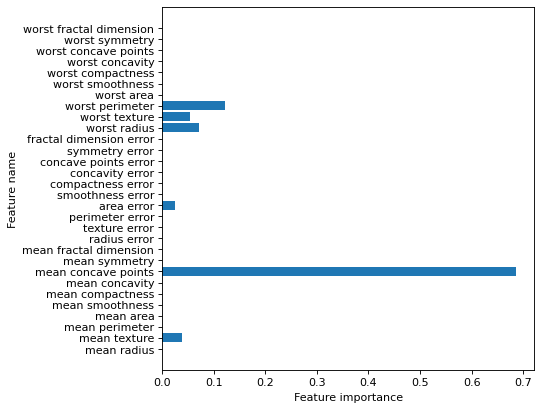

In [21]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)

plot_feature_importances(clf, features)

<font color = green>

##  RandomForest

</font>

In [61]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
print(f"\n======Random Forest\n")
clf = None
accuracy_train=[]
accuracy_test=[]

max_features_list = [20,12,10,8,6,4,3,2,1]    
for i, max_features in enumerate(max_features_list):
    clf = RandomForestClassifier(
        random_state=0,        
        max_features= max_features,    
    ).fit(X_train, y_train)
    accuracy_train.append(clf.score(X_train, y_train))
    accuracy_test.append(clf.score(X_test, y_test))
    print ('max_features = {}:\n\t accuracy_train = {:.3%}\n\t accuracy_test = {:.3%}'.format (
        max_features_list[i], accuracy_train[i], accuracy_test[i]))
    
# END_CODE 

idx_max=np.argmax(accuracy_test)

print(f"max_features is = {max_features_list[idx_max]}")
print(f"train accuracy= {accuracy_train[idx_max]}")
print(f"test accuracy= {accuracy_test[idx_max]}")


======Random Forest

max_features = 20:
	 accuracy_train = 100.000%
	 accuracy_test = 96.503%
max_features = 12:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 10:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 8:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 6:
	 accuracy_train = 100.000%
	 accuracy_test = 96.503%
max_features = 4:
	 accuracy_train = 100.000%
	 accuracy_test = 97.203%
max_features = 3:
	 accuracy_train = 100.000%
	 accuracy_test = 96.503%
max_features = 2:
	 accuracy_train = 100.000%
	 accuracy_test = 95.105%
max_features = 1:
	 accuracy_train = 100.000%
	 accuracy_test = 95.804%
max_features is = 12
train accuracy= 1.0
test accuracy= 0.972027972027972


<font color = green>

##  Gradient Boosting Decision Trees (GBDT)

</font>


In [63]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
print('\n=======Gradient Boosting Decision Trees \n')
for i in range(1,6):
    clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=i).fit(X_train, y_train)

# END_CODE 
    print(f'The Depth = {i}')
    print("\ttrain accuracy= {:.3%}".format(clf.score(X_train, y_train)))
    print("\ttest accuracy= {:.3%}".format(clf.score(X_test, y_test)))


=======Gradient Boosting Decision Trees 

The Depth = 1
	train accuracy= 92.723%
	test accuracy= 95.804%
The Depth = 2
	train accuracy= 97.418%
	test accuracy= 96.503%
The Depth = 3
	train accuracy= 98.826%
	test accuracy= 95.804%
The Depth = 4
	train accuracy= 99.531%
	test accuracy= 92.308%
The Depth = 5
	train accuracy= 99.531%
	test accuracy= 92.308%


<font color = green>

##  XGBoost

</font>

In [66]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
from xgboost import XGBClassifier
clf = XGBClassifier(use_label_encoder=False, eval_metric= 'logloss')
clf.fit(X_train, y_train)

# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 100.000%
test accuracy= 98.601%
